# Machine Learning Final Exam, Aug Semester, 2020

In this exam, you will demonstrate your understanding of the material from the lectures and labs.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Download the [CSV dataset](http://www.cs.ait.ac.th/~mdailey/class/ml/final-exam-data.csv) for the exam.
Note that the data are two dimensional with labels '0' and '1'. Provide a scatter plot for the data with
the two classes shown in different colors.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [30]:
# Place code to load the data and plot the scatterplot here
df = pd.read_csv('final-exam-data.csv')
df.columns = df.columns.str.replace('# x1', 'x1')
df.head()

,x1,x2,y
0,3.974170,3.138378,0.0
1,6.037439,7.155408,1.0
2,3.619643,2.524895,1.0
3,3.366346,3.106862,0.0
4,3.743221,9.250866,1.0


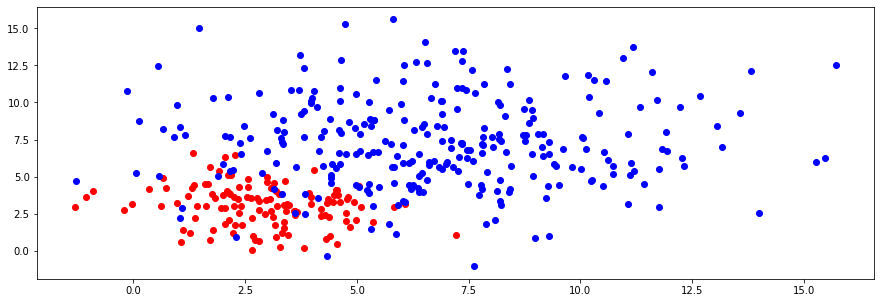

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df['x1'][df['y']==0], df['x2'][df['y']==0], 'ro')
plt.plot(df['x1'][df['y']==1],df['x2'][df['y']==1], 'bo')
plt.show()

## Question 2 (30 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Using the logistic regression code we developed in lab, fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

In [32]:
import random
def partition(X, y, percent_train=0.8):
    m = y.shape[0]
    idx = np.arange(0,m)
    random.seed(1412)
    random.shuffle(idx)
    m_train = int(m * percent_train)
    train_idx = idx[:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1)

In [33]:
df = pd.DataFrame(df).to_numpy()
X = df[:,:-1]
y = df[:,-1]
X.shape,y.shape

((400, 2), (400,))

In [34]:
X_train, y_train, X_val, y_val = partition(X,y,percent_train=0.8)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((320, 2), (320, 1), (80, 2), (80, 1))

In [41]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        #print(cost)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

In [48]:
X_train_aug = np.insert(X_train, 0, 1,axis=1)
X_val_aug = np.insert(X_val, 0, 1,axis=1)
theta_initial = np.ones((X_train_aug.shape[1],1))
print('X shape :',X_train_aug.shape)
print('theta_initial :',theta_initial.shape)
theta_train, j_history = train(X_train_aug, y_train, theta_initial, 0.05, 2000)

print('Optimal theta: %f, %f, %f' % (theta_train[0],theta_train[1],theta_train[2]))
print('Cost Funtion reducet from %f to  %f in %d itreations' % (j_history[0],j_history[-1],2000))

X shape : (320, 3)
theta_initial : (3, 1)
Optimal theta: -4.103871, 0.478478, 0.602768
Cost Funtion reducet from 2.144578 to  0.243613 in 2000 itreations


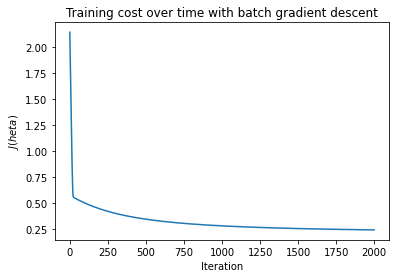

In [49]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent")
plt.show()

In [50]:
def r_squared(y, y_pred):
    return 1 - (np.square(y - y_pred).sum() / np.square(y - y.mean()).sum())

def get_accuracy(X, y, theta):
    y_test_pred_soft_norm = h(X, theta)
    y_test_pred_hard_norm = (y_test_pred_soft_norm > 0.5).astype(int)
    test_rsq_soft_norm = r_squared(y, y_test_pred_soft_norm)
    test_rsq_hard_norm = r_squared(y, y_test_pred_hard_norm)
    test_acc_norm = (y_test_pred_hard_norm == y).astype(int).sum() / y.shape[0]
    return test_rsq_soft_norm, test_rsq_hard_norm, test_acc_norm

In [51]:
X_train_aug.shape,y_train.shape,X_val_aug.shape,y_val.shape

((320, 3), (320, 1), (80, 3), (80, 1))

In [52]:
train_r2_soft, train_r2_hard, train_acc = get_accuracy(X_train_aug, y_train, theta_train)
val_r2_soft, val_r2_hard, val_acc = get_accuracy(X_val_aug, y_val, theta_train)

print(f'Train: R2 soft {train_r2_soft:.2f} R2 hard {train_r2_hard:.2f} Accuracy {train_acc:.2f} ')
print(f'Validation: R2 soft {val_r2_soft:.2f} R2 hard {val_r2_hard:.2f} Accuracy {val_acc:.2f} ')

Train: R2 soft 0.66 R2 hard 0.49 Accuracy 0.89 
Validation: R2 soft 0.60 R2 hard 0.31 Accuracy 0.86 


In [53]:
yhat_train = h(X_train_aug, theta_train)
yhat_val = h(X_val_aug, theta_train)
yhat_train.shape,yhat_val.shape

((320, 1), (80, 1))

In [56]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

In [57]:
# Change 0.something to 0 or 1
def convert_soft_to_hard(yhat):
    for index, i in enumerate(yhat):
        if i > 0.5:
            yhat[index] = 1
        else:
            yhat[index] = 0
    
    return yhat

yhat_train = h(X_train_aug, theta_train)
yhat_train = convert_soft_to_hard(yhat_train)
yhat_val = h(X_val_aug, theta_train)
yhat_val = convert_soft_to_hard(yhat_val)
print(np.unique(yhat_train, return_counts=True))
print(np.unique(yhat_val, return_counts=True))

(array([0., 1.]), array([ 94, 226], dtype=int64))
(array([0., 1.]), array([17, 63], dtype=int64))


In [58]:
def find_point(yhat, ytest):
    Correct_class0 = []
    Correct_class1 = []
    Incorrect = []
    for index, i in enumerate(yhat):
        if (i == 0) and (ytest[index] == 0):
            Correct_class0.append(index)
        elif (i == 1) and (ytest[index] == 1):
            Correct_class1.append(index)
        else:
            Incorrect.append(index)
    return Correct_class0, Correct_class1, Incorrect

train_Cor0, train_Cor1, train_Incor = find_point(yhat_train, y_train)
val_Cor0, val_Cor1, val_Incor = find_point(yhat_val, y_val)

# convert to numpy array
train_Cor0, train_Cor1, train_Incor = np.array(train_Cor0), np.array(train_Cor1), np.array(train_Incor)
val_Cor0, val_Cor1, val_Incor = np.array(val_Cor0), np.array(val_Cor1), np.array(val_Incor)

In [59]:
print(train_Cor0.shape, train_Cor1.shape, train_Incor.shape)
print(val_Cor0.shape, val_Cor1.shape, val_Incor.shape)

(80,) (205,) (35,)
(14,) (55,) (11,)


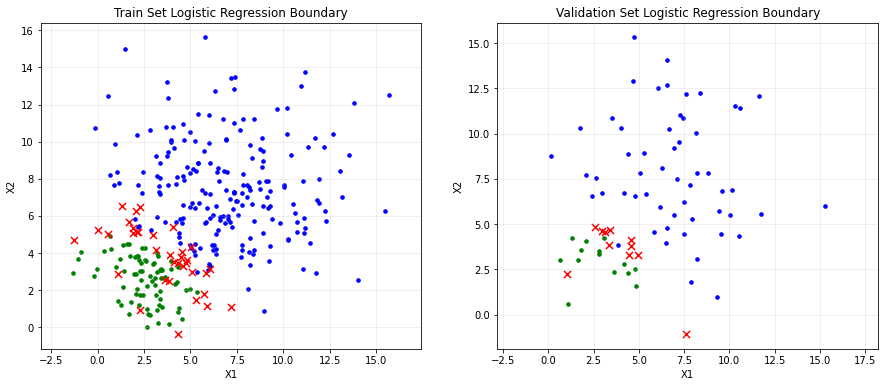

In [68]:
def plot_points(X, cor0, cor1, incor,title):
    plt.title(f'{title} Set Logistic Regression Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(axis='both', alpha=.25)
    plt.scatter(X[:, 1][cor0], X[:, 2][cor0], s=50, c='g', marker='.', label='y = 0')
    plt.scatter(X[:, 1][cor1], X[:, 2][cor1], s=50, c='b', marker='.', label='y = 0')
    plt.scatter(X[:, 1][incor], X[:, 2][incor], s=50, c='r', marker='x', label='y = 0')
    plt.axis('equal')

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_points(X_train_aug, train_Cor0, train_Cor1, train_Incor,'Train')
plt.subplot(1, 2, 2)
plot_points(X_val_aug, val_Cor0, val_Cor1, val_Incor,'Validation')

## Question 3 (20 points)

Repeat Question 2 using the PyTorch neural network library. Your PyTorch model should have a single linear layer with two inputs and a single output, a logistic sigmoid activation function, binary cross entropy loss function, and stochastic gradient descent for the optimizer. Show the same plots you showed for Question 2.

In [69]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [70]:
X.shape,y.shape

((400, 2), (400,))

In [76]:
X_train, y_train, X_val, y_val = partition(X,y,percent_train=0.8)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((320, 2), (320, 1), (80, 2), (80, 1))

In [87]:
#Convert to tensor 
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)
X_val_tensor = torch.tensor(X_val)
y_val_tensor = torch.tensor(y_val)

y_train_tensor = torch.reshape(y_train_tensor,(-1,))

X_train_tensor.shape,y_train_tensor.shape

(torch.Size([320, 2]), torch.Size([320]))

In [88]:
# Place code to build, train, and evaluate your PyTorch model here
class Network(nn.Module):
    
    def __init__(self,input_size,output_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.l1(x)
        x = self.sigmoid(x)
        return x

In [89]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [90]:
model = Network(2,1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.BCELoss()

In [94]:
X_train_tensor = torch.FloatTensor(X_train.tolist())
y_train_tensor = torch.LongTensor(y_train)
# y_train_tensor = torch.reshape(y_train_tensor,(-1,))
X_train_tensor.shape,y_train_tensor.shape

(torch.Size([320, 2]), torch.Size([320, 1]))

In [96]:
epochs = 500
batch_size = 10
loss_log = []
y_true = []
y_pred = []
train_yhat = []
running_loss = 0
total_loss = 0

for e in range(epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        x_mini = X_train_tensor[i:i + batch_size].to(torch.float32)
        y_mini = y_train_tensor[i:i + batch_size].to(torch.float32)
        
        x_var = Variable(x_mini, requires_grad=True).to(device)
        y_var = Variable(y_mini, requires_grad=True).to(device)

        # Forward pass
        output = model(x_var.float())
        #loss = criterion(output, y_var.unsqueeze(1)) 
        loss = criterion(output, y_var)

        # Append loss
        loss_log.append(loss)

        # Backward propagation and optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Running loss
        running_loss += loss.item() * x_var.size(0)
        epoch_loss = running_loss / X_train_tensor.shape[0]
        
        # Predict
        pred = np.round(output.detach().cpu().numpy())
        y_var = y_var.float()
        y_true.extend(y_var.tolist()) 
        y_pred.extend(pred.reshape(-1).tolist())
        

    if e % 50 == 0:
        print(f'Epochs {e:2.0f}, Loss = {epoch_loss:.5f} Accuracy = {accuracy_score(y_true,y_pred)}')
        loss_log.append(loss.item())
        
#print(" Total Loss is ", loss.item())
print("Accuracy on training set is" , accuracy_score(y_true,y_pred))

Epochs  1, Loss = 0.45951 Accuracy = 0.909375
Epochs 51, Loss = 11.89860 Accuracy = 0.9106971153846154
Epochs 101, Loss = 23.25752 Accuracy = 0.9123468137254902
Epochs 151, Loss = 34.55234 Accuracy = 0.914453125
Epochs 201, Loss = 45.79536 Accuracy = 0.9155167079207921
Epochs 251, Loss = 56.99606 Accuracy = 0.9161582341269842
Epochs 301, Loss = 68.16193 Accuracy = 0.9165873344370861
Epochs 351, Loss = 79.29889 Accuracy = 0.91689453125
Epochs 401, Loss = 90.41172 Accuracy = 0.9170475746268657
Epochs 451, Loss = 101.50428 Accuracy = 0.9168902101769911
Accuracy on training set is 0.91676875


In [97]:
model.eval()
y_true = []
y_pred = []
#val_yhat = []
with torch.no_grad():
    for i in range(X_val.shape[0]):
        x_mini = X_train_tensor[i].to(torch.float32)
        y_mini = y_train_tensor[i].to(torch.float32)
        
        x_var = Variable(x_mini, requires_grad=False).to(device)
        y_var = Variable(y_mini, requires_grad=False).to(device)

        # Create model on data
        output = model(x_var.float())
                    
        #PREDICTIONS
        pred = np.round(output.detach().cpu().numpy())
        #val_yhat.append(pred)
        target = y_var.float()
        y_true.extend(y_var.tolist()) 
        y_pred.extend(pred.reshape(-1).tolist())

        
print("Accuracy on validation set is" , accuracy_score(y_true,y_pred))
print("***********************************************************")

Accuracy on validation set is 0.8875
***********************************************************


In [98]:
# Extract weights and bias from model
model_weight = list(model.parameters())[0].data.cpu().numpy()
model_bias = list(model.parameters())[1].data.cpu().numpy()

# Reshape model_bias
model_bias = model_bias.reshape(1, -1)

# Concatate weight and bias to create linear theta
linear_theta = np.concatenate((model_bias, model_weight), axis=1)
print(linear_theta.shape)

# Fix linear theta shape
linear_theta = linear_theta.reshape(-1, 1)
linear_theta.shape

(1, 3)


(3, 1)

In [99]:
# np.ones((shape))
intercept = np.ones((X_train.shape[0], 1))
# concatenate the intercept based on axis=1
X_train= np.concatenate((intercept, X_train), axis=1)
# np.ones((shape))
intercept = np.ones((X_val.shape[0], 1))
# concatenate the intercept based on axis=1
X_val = np.concatenate((intercept, X_val), axis=1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)#

(320, 3) (80, 3) (320, 1) (80, 1)


In [100]:
# convert to numpy array
train_Cor0, train_Cor1, train_Incor = np.array(train_Cor0), np.array(train_Cor1), np.array(train_Incor)
val_Cor0, val_Cor1, val_Incor = np.array(val_Cor0), np.array(val_Cor1), np.array(val_Incor)
print(train_Cor0.shape, train_Cor1.shape, train_Incor.shape)
print(val_Cor0.shape, val_Cor1.shape, val_Incor.shape)

(80,) (205,) (35,)
(14,) (55,) (11,)


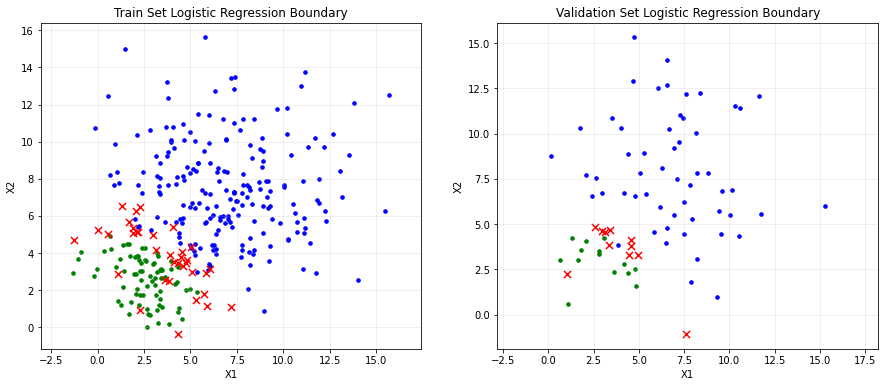

In [101]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_points(X_train_aug, train_Cor0, train_Cor1, train_Incor,'Train')
plt.subplot(1, 2, 2)
plot_points(X_val_aug, val_Cor0, val_Cor1, val_Incor,'Validation')

## Question 4 (20 points)

Add a 10-unit hidden layer with ReLU activation to the PyTorch model from Question 3. Plot training loss and validation loss as function of epoch of training. Do you see any evidence of overfitting?

In [102]:
# Place code to build, train, and evaluate your PyTorch model here
class Network(nn.Module):
    
    def __init__(self,input_size,hidden_size,output_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.l2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.sigmoid(x)
        return x

In [104]:
model = Network(2,10,1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
loss_func = nn.BCELoss()

In [105]:
epochs = 500
batch_size = 10
loss_log = []
y_true = []
y_pred = []
train_yhat = []
running_loss = 0
total_loss = 0

for e in range(epochs):
    for i in range(0, X_train_tensor.shape[0], batch_size):
        x_mini = X_train_tensor[i:i + batch_size].to(torch.float32)
        y_mini = y_train_tensor[i:i + batch_size].to(torch.float32)
        
        x_var = Variable(x_mini, requires_grad=True).to(device)
        y_var = Variable(y_mini, requires_grad=True).to(device)

        # Forward pass
        output = model(x_var.float())
        #loss = criterion(output, y_var.unsqueeze(1)) 
        loss = criterion(output, y_var)

        # Append loss
        loss_log.append(loss)

        # Backward propagation and optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Running loss
        running_loss += loss.item() * x_var.size(0)
        epoch_loss = running_loss / X_train_tensor.shape[0]
        
        # Predict
        pred = np.round(output.detach().cpu().numpy())
        y_var = y_var.float()
        y_true.extend(y_var.tolist()) 
        y_pred.extend(pred.reshape(-1).tolist())
        

    if e % 50 == 0:
        print(f'Epochs {e:2.0f}, Loss = {epoch_loss:.5f} Accuracy = {accuracy_score(y_true,y_pred)}')
        loss_log.append(loss.item())
        
#print(" Total Loss is ", loss.item())
print("Accuracy on training set is" , accuracy_score(y_true,y_pred))

Epochs  0, Loss = 0.52769 Accuracy = 0.68125
Epochs 50, Loss = 19.37163 Accuracy = 0.7773897058823529
Epochs 100, Loss = 31.84935 Accuracy = 0.8364789603960396
Epochs 150, Loss = 42.77648 Accuracy = 0.8618998344370861
Epochs 200, Loss = 53.21395 Accuracy = 0.8748134328358209
Epochs 250, Loss = 63.45223 Accuracy = 0.8830926294820717
Epochs 300, Loss = 73.53064 Accuracy = 0.8896387043189369
Epochs 350, Loss = 83.46877 Accuracy = 0.8942307692307693
Epochs 400, Loss = 93.29734 Accuracy = 0.897482855361596
Epochs 450, Loss = 103.03281 Accuracy = 0.8996812638580931
Accuracy on training set is 0.9014


First, The validation accuracy is higher than training accuracy because in this network we use the relu. The relu activation function force the model to not activate all the neurons at the same time thus is the reason for lower accuracy of training set.

After that the model start to learn and validation and accruacy is very close and It not show any sign of overfitting.

*Discuss whether you observe overfitting here.*

## Question 5 (10 points)

In fact, the data from Question 1 were generated from a Gaussian mixture model. If you were given the data without the labels, for unsupervised learning, do you think the EM algorithm for Gaussian mixtures with $k=2$ components would recover the two classes? Why or why not?

*Discuss here.*

In [24]:
def init_gmm(X, k):
    m = X.shape[0]
    n = X.shape[1]
    Mu = np.zeros((n,k))
    Sigma = np.zeros((k,n,n))
    Phi = np.zeros(k)
    order = np.random.permutation(m)
    for j in range(k):
        # Initially assign equal probability to each cluster/outcome
        Phi[j] = 1/k      
        # Ramdomly assign mean to one of the data points       
        Mu[:,j] = X[order[j],:].T
        # Initial covariance is identity matrix
        Sigma[j,:,:] = np.eye(n)    
    return Phi, Mu, Sigma


def Gaussian(X, mean, covariance):
    k = len(mean)
    X = X - mean.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * np.sum(X @ np.linalg.pinv(covariance) * X, axis=1))
    return p

def gaussian(x, mean,covariance):
    k = len(mean)
    X = (x - mean).reshape(-1,1)
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(covariance)**0.5)) * np.exp(-0.5 * (X.T @ np.linalg.pinv(covariance) @ X))
    return p


# Run one iteration of EM

def iterate_em_gmm(X, threshold, Phi, Mu, Sigma):
    m = X.shape[0]
    n = X.shape[1]
    k = len(Phi)
    threshold = np.reshape(np.repeat(threshold, n*k), (n,k))
    pj_arr = np.zeros((m,k))
    
    # E-step: calculate w_j^i
    W = np.zeros((m, k))
    for j in range(k):
        pj = Gaussian(X, Mu[:,j], Sigma[j])
        pj_arr[:,j] = pj
        W[:,j] = Phi[j] * pj
    
    # W tells us what is the relative weight of each cluster for each data point
    W[:,:] = W * np.tile(1/np.sum(W,1),(k,1)).T

    # M-step: adjust mean and sigma
    Phi[:] = sum(W) / m
    Mu_previous = Mu.copy()
    for j in range(k):
        # Split cluster specific W for each dimension
        Wj = np.tile(W[:,j],(2,1)).T
        # Compute Mu for each variable for each cluster
        Mu[:,j] = sum(X * Wj)/sum(Wj)
        Muj = np.tile(Mu[:,j],(m,1))
        Sigma[j,:,:] = np.matmul((X - Muj).T, (X - Muj) * Wj) / sum(W[:,j])

    if (abs(Mu-Mu_previous) <= threshold).all():
        converged = True
    else:
        converged = False

    labels = np.argmax(pj_arr, axis = 1)
    pj = np.max(pj_arr,axis=1)
    X_label = np.insert(X, 2, labels, axis=1)
    return converged, pj, X_label

In [25]:
threshold = np.matrix(.01)
k = 2
Phi, Mu, Sigma = init_gmm(X, k)

converged = False
while not converged:
    converged, pj, X_label = iterate_em_gmm(X, threshold, Phi, Mu, Sigma)

In [26]:
print(Phi)
print(Mu)
print(Sigma)

[0.33876147 0.66123853]
[[3.04370834 6.8005324 ]
 [3.15389813 7.41526761]]
[[[ 2.50334724 -0.19437936]
  [-0.19437936  2.06374694]]

 [[ 9.68512642 -0.27773099]
  [-0.27773099  8.65184261]]]


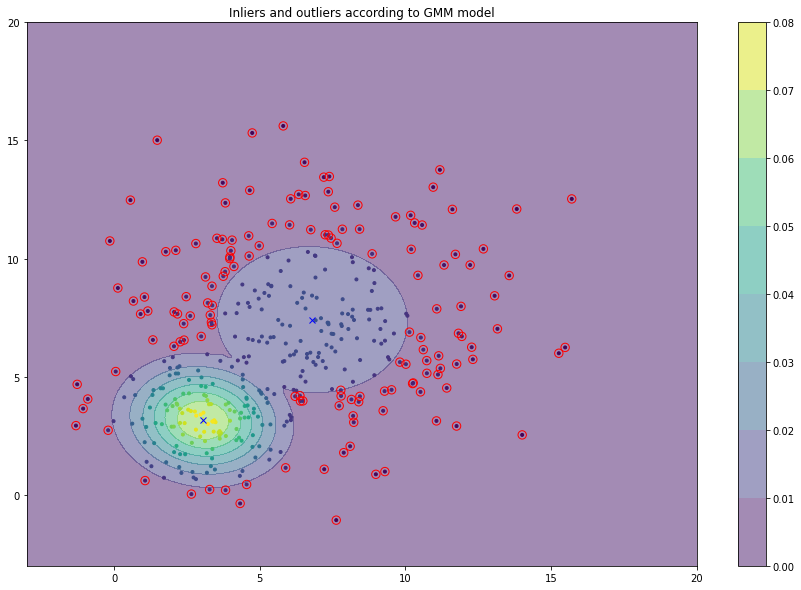

In [28]:
outlier_prob = .01
outliers = np.nonzero(pj < outlier_prob)[0]

fig1 = plt.figure(figsize=(15,10))

xlist = np.linspace(-3, 20, 100)
ylist = np.linspace(-3, 20, 100)
XX, YY = np.meshgrid(xlist, ylist)
ZZ = np.zeros(XX.shape)

for c in np.arange(0,k):    
    X_class = X[np.where(X_label[:,2] == c)[0],:]
    
    Z = np.zeros(XX.shape)
    i = 0
    while i < XX.shape[0]:
        j = 0
        while j < XX.shape[0]:
            pt = np.array([[XX[i,j], YY[i,j]]])
            Z[i,j] = Gaussian(pt, Mu[:,c], Sigma[c])[0]
            j = j + 1
        i = i + 1    
    ZZ = np.maximum(ZZ,Z)
cp = plt.contourf(XX, YY, ZZ,alpha=0.5)
cbar = fig1.colorbar(cp)

plt.scatter(X[:,0],X[:,1],marker=".",c=pj,cmap='viridis');
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);
plt.plot(Mu[0,0], Mu[1,0],'bx',Mu[0,1], Mu[1,1],'bx')

plt.title('Inliers and outliers according to GMM model')
plt.show()

Yes, it can recover the two classes but not completely. In order to generated data from gaussian mixture model we need to have mean, co-variance and initial weights (phi). We can use EM algorithms on the data to find the best possible ground truth parameters (In this case mean, co-variance and initial weight). Those parameters should be close to the one that we use to generated but it impossible for it to be extacly the same.

## Question 6 (10 points)

Consider the following problem: Students taking classes in Room TC 103 often feel the room is too cold or too hot. To solve the problem, we connect three air conditioners' on/off switches to a computer, place a temperature sensor outdoors next to the room, and put a button box on each student's desk with 3 buttons, labeled "I'm freezing," "I'm sweating", and "I feel good." Students can press any of the three buttons to indicate their comfort level. Every 10 minutes, the outdoor temperature is measured in degrees Celsius, and the current comfort level of each student (1, 2, or 3) is measured. The system gets the measurements as input and then has to set the control for each of the three air conditioners to high, low, or off for the next 10 minutes.

Suppose you would like to build a reinforcement learning agent to optmize the air conditioning control for the room. Do the following:

1. Briefly explain the state space, action space, reward function, and discount factor you think should be used for this problem.
2. Briefly explain the reason it is difficult to know the transition probabilities for this problem.
3. Briefly describe how you could use a neural network to learn the state transition probabilities.

*Write your explanations here.*

Goal : make the student feel comfortable (not too hot or too cold), (Find pi(s) = a) state : sweating, comfortable, freezing (3 states) action: decrease temperature, turn off (In this case I assume that it will make no change to temperature), increase temperature

reward: decrease temperature, turnoff, increase tempearature state0 : [1, 0, -1] state1 : [0, 1, 0] state2 : [-1, 0, 1]

discount factor: 0 I don't think we need to cares about the reward in the future. In this case we are hot or cold! we need to be comfortable immediately and we also know that the class (environment) will come to an end soon (assume that the class is 3 hrs)

Q2. It is difficult to know the transition probabilities because it is difficult to determine the perfect temperature for each person. For example someone may go from sweating to freezing by just one temperature drop. The other reason is because we can have more than one person thus the state and reward may differ from each other but we only have one environment (everyone is in the same room)

Q3. In this case, I think we can use Deep-Q-Learning but it ways to overkill. In this particular problem I think it should be suffice to just use Q-learning algorithm.